# Réduction de Dimensionnalité et Analyse d'Image avec PCA, UMAP et RandomForest

Ce notebook initie par une phase de préparation des données, avant de s'engager dans des méthodes de réduction de dimension via PCA et UMAP. Il procède ensuite à l'entraînement d'un modèle RandomForest sur l'ensemble de données original ainsi que sur celui transformé par PCA, évaluant leur performance à travers des rapports de classification et des matrices de confusion. En conclusion, il met en œuvre une visualisation des données transformées dans un espace bidimensionnel grâce à PCA et UMAP, démontrant ainsi l'utilité de ces méthodes pour la visualisation et l'optimisation potentielle de la performance des modèles de machine learning.

In [5]:
# Installation des dépendances nécessaires
!pip install opencv-python pandas matplotlib scikit-learn umap-learn

# Importation des modules
import os
import pandas as pd
import cv2
from concurrent.futures import ThreadPoolExecutor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

     -------------------------------------- 85.7/85.7 kB 967.6 kB/s eta 0:00:00
  Using cached pynndescent-0.5.12-py3-none-any.whl (56 kB)


In [6]:
import umap

In [8]:
# Configuration des chemins et chargement des données
path = "C:/Users/user/OneDrive/DATASIENCETEST/PROJET/Data/Update/images/image_train"

# Chargement des métadonnées et des étiquettes
X = pd.read_csv(r"C:\Users\user\OneDrive\DATASIENCETEST\PROJET\Data\Update\X_train_update.csv", index_col=0)
y = pd.read_csv(r"C:\Users\user\OneDrive\DATASIENCETEST\PROJET\Data\Update\Y_train_CVw08PX.csv", index_col=0).squeeze().map(str)

# Ajout du chemin complet vers chaque image dans le DataFrame X
X['image_path'] = X.apply(lambda row: os.path.join(path, f'image_{row.imageid}_product_{row.productid}.jpg'), axis=1)


In [9]:
# Prétraitement des images

# Paramètres pour le redimensionnement
image_size = (50, 50)

# Fonction pour lire et redimensionner une image
def process_image(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_gray_resized = cv2.resize(img_gray, image_size, interpolation=cv2.INTER_AREA)
    return img_gray_resized

# Liste des chemins d'images à traiter
path_list = X['image_path'].tolist()

# Utilisation de ThreadPoolExecutor pour traiter les images en parallèle
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    images_resized = list(executor.map(process_image, path_list))


In [10]:
#Construction des données du DataFrame

# Fonction pour convertir les images en une liste de valeurs de pixels
def image_to_pixel_list(image, idx, label):
    pixel_list = [idx, label]
    for row in image:
        for pixel in row:
            pixel_list.append(pixel)
    return pixel_list

# Préparation des données pour le DataFrame
data_for_df = [image_to_pixel_list(image, idx, label) for image, idx, label in zip(images_resized, X.index, y)]

# Création des noms de colonnes
column_names = ['index', 'label'] + [f'pixel{i+1}' for i in range(image_size[0] * image_size[1])]


In [11]:
# Création du DataFrame

# Initialisation du DataFrame vide avec des types spécifiés pour économiser de la mémoire
column_types = {f'pixel{i}': 'uint8' for i in range(1, image_size[0] * image_size[1] + 1)}
column_types['index'] = int
column_types['label'] = str

# Préparation d'une liste pour recueillir les DataFrames de lots
df_list = []

# Taille du lot pour le traitement par morceaux
batch_size = 5000

# Traitement par lots
for start in range(0, len(data_for_df), batch_size):
    end = start + batch_size
    batch_data = data_for_df[start:end]
    batch_df = pd.DataFrame(batch_data, columns=column_names)
    # Assurez-vous que les types sont corrects
    batch_df = batch_df.astype(column_types)
    df_list.append(batch_df)

# Concaténez tous les DataFrames de la liste en une seule opération
rakuten_images_df = pd.concat(df_list, ignore_index=True)



In [12]:
display(rakuten_images_df.head())

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500
0,0,10,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,1,2280,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,50,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,3,1280,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,4,2705,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [13]:
# Sauvegarde du DataFrame en CSV
rakuten_images_df.to_csv('rakuten_images_processed.csv', index=False)


In [14]:
#Charger le df stocké:

rakuten_images_processed= pd.read_csv('rakuten_images_processed.csv')
rakuten_images_processed.drop(columns=['index'],inplace=True)

In [15]:
rakuten_images_processed.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500
0,10,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [16]:
#Creation des variables et target:
target = rakuten_images_processed['label']
data = rakuten_images_processed.drop('label',axis=1)

# PCA

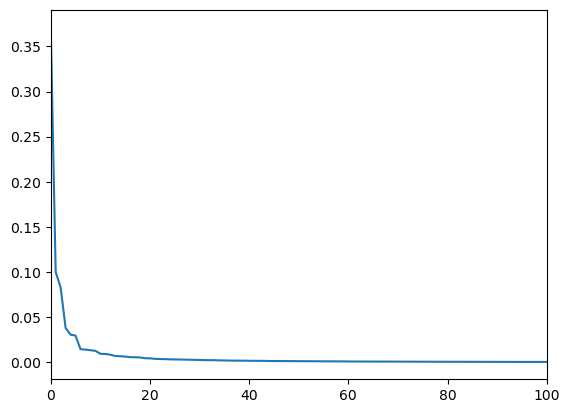

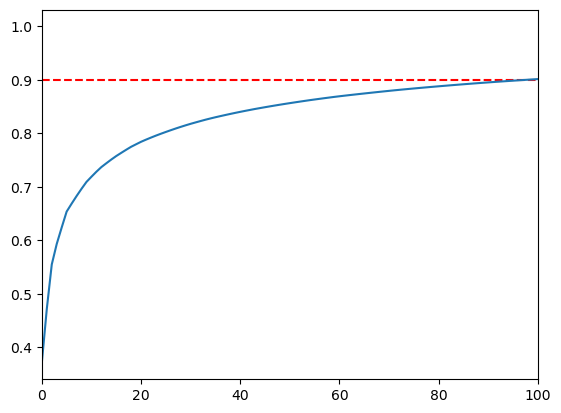

In [17]:
#Analyse de l'impact de la réduction de variables sur la variance du dataset:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import itertools # Pour créer des iterateurs
from sklearn.metrics import f1_score, make_scorer, classification_report

pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.axhline(y = 0.90, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [18]:
#Réduction de dimensionnalité avec PCA
pca = PCA(n_components = 0.90)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 99


In [19]:
display(data)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84911,255,255,255,255,255,255,255,84,15,22,...,15,18,85,255,255,255,255,255,255,255
84912,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
84913,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
84914,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [20]:
# Imprimer la part de variance expliquée par les composantes PCA retenues
print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(), 2))

La part de variance expliquée est 0.9


In [21]:
#Projection des données dans le nouveau space avec 99 varaibles

X_train = data[:67933] #67933=84916*80%
X_test = data[67933:]

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
y_train = y[:67933]
y_test = y[67933:]

# Entrainement d'un modèle 

- Dataset complet

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs = -1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4626391096979332

In [24]:
#Création d'une fonction propre pour la confusion matrix

#Variable target avec les labels organisées 
y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):

    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(10,10))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()

              precision    recall  f1-score   support

          10       0.45      0.55      0.50       641
        1140       0.48      0.25      0.33       533
        1160       0.69      0.71      0.70       828
        1180       0.53      0.10      0.17       161
        1280       0.20      0.16      0.18       959
        1281       0.26      0.04      0.07       433
        1300       0.39      0.55      0.46      1009
        1301       0.66      0.23      0.35       162
        1302       0.53      0.17      0.26       452
        1320       0.35      0.24      0.28       617
        1560       0.34      0.37      0.35       977
        1920       0.72      0.68      0.70       828
        1940       0.81      0.14      0.24       181
        2060       0.32      0.43      0.37       966
        2220       1.00      0.09      0.16       173
        2280       0.50      0.58      0.54       949
        2403       0.33      0.61      0.43       964
        2462       0.43    

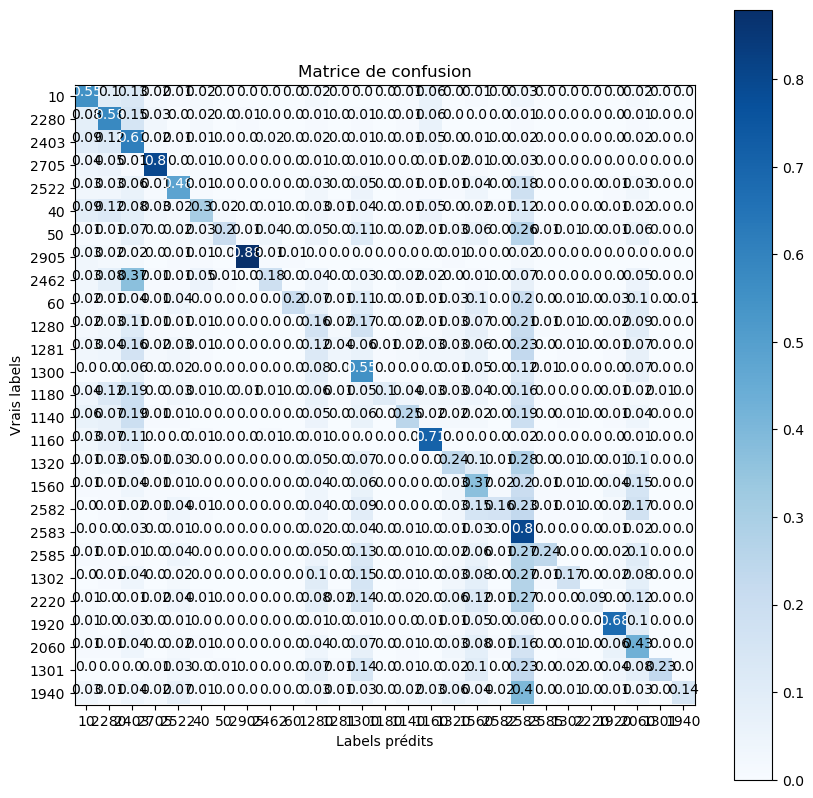

In [25]:
# Évaluation du modèle sur l'ensemble de test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matx(y_test,y_pred) #montre les résultats en pourcentages!

- Dataset reduit:

In [26]:
clf_red = RandomForestClassifier(n_jobs = -1)

clf_red.fit(X_train_pca, y_train)
clf_red.score(X_test_pca, y_test)

0.41429664959076723

              precision    recall  f1-score   support

          10       0.45      0.46      0.45       641
        1140       0.38      0.18      0.25       533
        1160       0.59      0.67      0.62       828
        1180       0.75      0.06      0.10       161
        1280       0.17      0.12      0.14       959
        1281       0.22      0.02      0.03       433
        1300       0.37      0.45      0.41      1009
        1301       0.73      0.20      0.32       162
        1302       0.61      0.13      0.22       452
        1320       0.34      0.18      0.24       617
        1560       0.28      0.32      0.30       977
        1920       0.57      0.63      0.60       828
        1940       0.74      0.08      0.14       181
        2060       0.28      0.40      0.33       966
        2220       1.00      0.08      0.14       173
        2280       0.38      0.60      0.47       949
        2403       0.31      0.56      0.40       964
        2462       0.49    

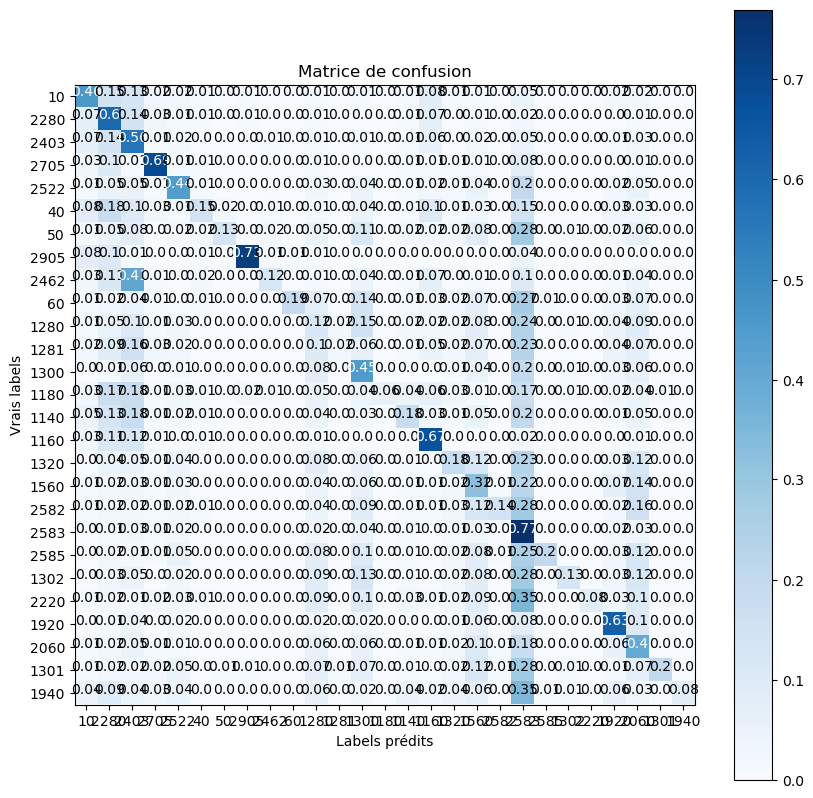

In [27]:
y_pred = clf_red.predict(X_test_pca)
print(classification_report(y_test, y_pred))
conf_matx(y_test,y_pred) #montre les résultats en pourcentages!

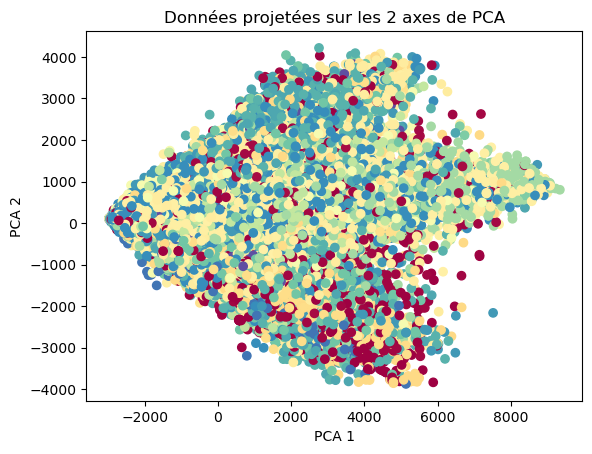

In [28]:
# Réduction de dimensionnalité avec PCA à deux composantes pour visualisation
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(data)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1], c = target, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

# UMAP

In [29]:
pip install umap-learn


In [30]:
# Réduction de dimensionnalité avec UMAP pour la visualisation
import umap

reducer = umap.UMAP(n_neighbors=50, n_components=2, random_state=42)
dataUMAP = reducer.fit_transform(data)


C:\Users\user\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


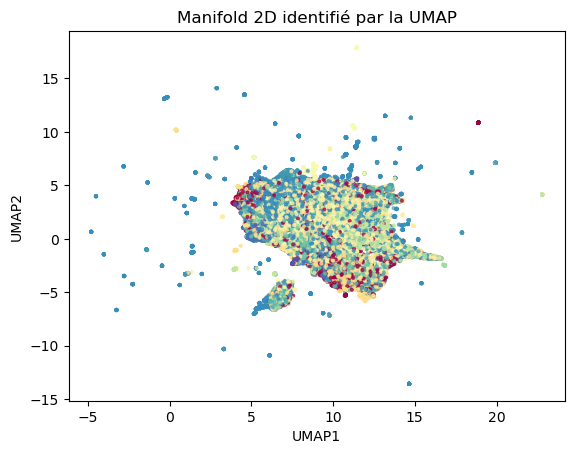

In [31]:
# Visualisation des données réduites avec UMAP
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataUMAP[:, 0], dataUMAP[:, 1], c=target, cmap=plt.cm.Spectral, alpha=.7, s=4)

ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

ax.set_title("Manifold 2D identifié par la UMAP")
plt.show()


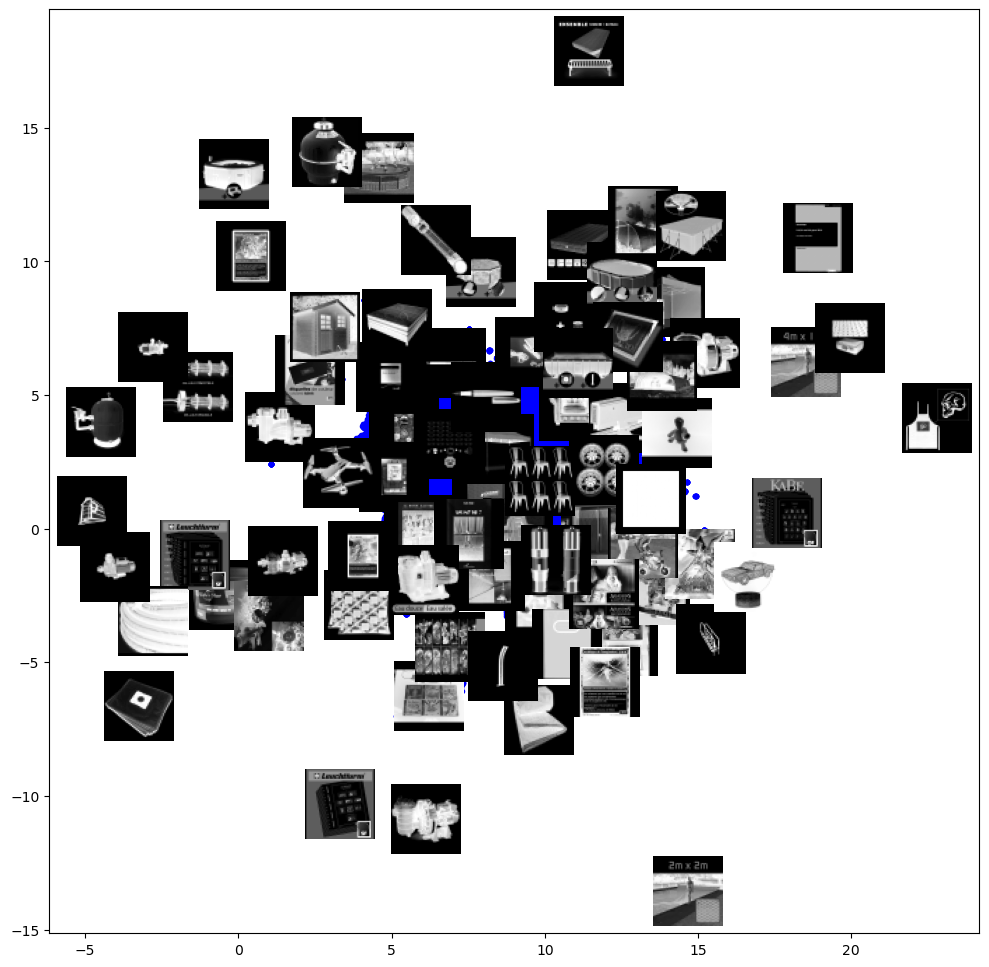

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#Fonction pour visualiser des données en 2D avec des images comme annotations.

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray_r', prefit=False):
    ax = ax or plt.gca()
    
    # Transforme les données si prefit=False, sinon utilise les données projetées directement
    if not prefit:
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')  # Dessine les points projetés
    
    # Si des images sont fournies, les ajoute au graphique
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])  # Initialise avec une valeur hors portée
        for i in range(data.shape[0]):  # Itère sur chaque point projeté
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:  # Vérifie la distance minimum pour éviter le surpeuplement
                continue  # Passe au point suivant si trop proche
            shown_images = np.vstack([shown_images, proj[i]])  # Ajoute le point à la liste des points affichés
            imagebox = AnnotationBbox(OffsetImage(images[i], cmap=cmap), proj[i], frameon=False)  # Crée une boîte d'annotation pour l'image
            ax.add_artist(imagebox)  # Ajoute l'image au graphique


#visualiser les résultats de la réduction de dimension avec UMAP
fig, ax = plt.subplots(figsize=(12, 12))
plot_components(data = dataUMAP, model = reducer, images=data.values.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, prefit = True)
